# Introduction to Programming for Data Science Assignment 2

## 1

In [2]:
import requests
from bs4 import BeautifulSoup

# Fetch the HTML content of the website.
url = "https://www.itsligo.ie/research/research-projects/"
print(url)
response = requests.get(url)
html_content = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find and print the terms of service information
terms_of_service_element = soup.find('a', string='Terms of Use')
if terms_of_service_element:
    terms_of_service_url = terms_of_service_element['href']
    full_url = f"https:{terms_of_service_url}"
    print(f"Terms of Service URL: {full_url}")
else:
    print("Terms of Service information not found on the page.")

https://www.itsligo.ie/research/research-projects/
Terms of Service URL: https:https://www.itsligo.ie/terms-of-use/


Looking through the website, I find out that there is a major table header and a sub tableheader. So I picked the exact html element I would need to use to define the table head. Since there are multiple tableheads, I will pick only the first one.

The table design on the website does not include a tbody, so using the td, I picked the exact html element I needed as well.

In [3]:


tables = soup.find('table')
heading = tables.find_all("tr", {"class": "projects-header fw5"})[0]
cells1 = heading.find_all(['th', 'td'])


#I had to manually select each of the columns i wanted
trows = tables.find_all('tr')
row_number = 1  # Initialize row number
for row in trows:
    # Initialize column number
    column_number = 1
    
    # Find the student name
    studname = row.find("td", {"class": "student-name fw5"})
    if studname:
        student_link = studname.find('a')
        if student_link:
            student_name = student_link.text.strip()
            print(f"Row {row_number}, Column {column_number}: {student_name}")
        column_number += 1
    
    # Find the project title
    projtitle = row.find("td", {"class": "project-title"})
    if projtitle:
        project_title = projtitle.text.strip()
        print(f"Row {row_number}, Column {column_number}: {project_title}")
        column_number += 1

    # Find the course
    course = row.find("td", {"class": "course"})
    if course:
        course_text = course.text.strip()
        print(f"Row {row_number}, Column {column_number}: {course_text}")
        column_number += 1

    # Find the research
    research = row.find("td", {"class": "research-centre"})
    if research:
        research_text = research.text.strip()
        print(f"Row {row_number}, Column {column_number}: {research_text}")
    
    row_number += 1  # Increment row number for the next iteration
    
for j, cell in enumerate(cells1):
    print(f" Row {row.parent.index(row) + 1}, Column {j + 1}: {cell.text.strip()}")

Row 7, Column 1: Aoife Gallagher
Row 7, Column 2: Supporting Bereaved Children in Primary School and Early Years Services: policy, practice and lived experiences
Row 7, Column 3: PhD
Row 7, Column 4: N/A
Row 8, Column 1: Chloe Cox
Row 8, Column 2: Higher Education for All - Provision of full-time online education to maximise access, participation and success for students who cannot attend on campus
Row 8, Column 3: PhD
Row 8, Column 4: N/A
Row 11, Column 1: Simeon Akindele Abolade
Row 11, Column 2: Photovoltaic and Photocatalytic performance study on Bismuth-chalcogenides using first-principles
Row 11, Column 3: PhD
Row 11, Column 4: N/AMISHE
Row 24, Column 1: Machailla McCabe
Row 24, Column 2: Exploring definitions of Mental Health & Establishing Validated Assessment Tools amongst Student Populations within the 3rd Level Setting.
Row 24, Column 3: Research Masters
Row 24, Column 4: N/A
Row 31, Column 1: Adam McDonnell
Row 31, Column 2: Chemical Profiling of Commercially Relevant Irish

Load data into a DataFrame, note that we need to adjust row_data to match the number of columns in the header¶.

In [4]:
import pandas as pd

# Initialize empty lists to store data
columns = []
data = []


tables = soup.find('table')


# Extract column headers
header_row = tables.find_all("tr", {"class": "projects-header fw5"})[0]
for header in header_row.find_all(['th', 'td']):
    columns.append(header.text.strip())
    
    
    
# Extract data rows
for row in trows:
    studname = row.find("td", {"class": "student-name fw5"})
    if studname:
        student_link = studname.find('a')
        if student_link:
            student_name = student_link.text.strip()
            
    projtitle = row.find("td", {"class": "project-title"})
    if projtitle:
        project_title = projtitle.text.strip()
        
    course = row.find("td", {"class": "course"})
    if course:
        course_text = course.text.strip()
        
    research = row.find("td", {"class": "research-centre"})
    if research:
        research_text = research.text.strip()          
            
            
            
    row_data = [cell.text.strip() for cell in row.find_all(['td'])]
    
    print(row_data)
    
    # Adjust row_data to match the number of columns in the header
    row_data = row_data[:len(columns)]  
    
    data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)

['Department of Marketing, Tourism & Sport']
[]
['Department of Research, Innovation and Engagement']
[]
['Department of Social Sciences']
[]
['Aoife Gallagher', 'Supporting Bereaved Children in Primary School and Early Years Services: policy, practice and lived experiences', 'PhD', 'N/A']
['Chloe Cox', 'Higher Education for All - Provision of full-time online education to maximise access, participation and success for students who cannot attend on campus', 'PhD', 'N/A']
['Department of Life Sciences']
[]
['Simeon Akindele Abolade', 'Photovoltaic and Photocatalytic performance study on Bismuth-chalcogenides using first-principles', 'PhD', 'N/AMISHE']
['Department of Civil Engineering & Construction']
[]
['Department of Environmental Science']
[]
['Department of Mechanical & Manufacturing Engineering']
[]
['Department of Yeats Academy of Arts, Design & Architecture']
[]
['Department of Mechatronic Engineering']
[]
['Department of Health & Nutritional Sciences']
[]
['Machailla McCabe', '

                                          Student Name Project Title  \
0             Department of Marketing, Tourism & Sport          None   
1                                                 None          None   
2    Department of Research, Innovation and Engagement          None   
3                                                 None          None   
4                        Department of Social Sciences          None   
..                                                 ...           ...   
184                                               None          None   
185   Department of Computing & Electronic Engineering          None   
186                                               None          None   
187                             Department of Research          None   
188                                               None          None   

    Course/Programme SRC/RRG  
0               None    None  
1               None    None  
2               None    None  
3          

Look through the output, I can see that I still inputted the major headings that I do not need, so I checked if any of the values actually got inputted right.

In [5]:
row12 = df.iloc[11]
print(row12)

row36 = df.iloc[35]
print(row36)

Student Name        Department of Civil Engineering & Construction
Project Title                                                 None
Course/Programme                                              None
SRC/RRG                                                       None
Name: 11, dtype: object
Student Name                                        Caroline Bradshaw
Project Title       An investigation into the breastfeeding practi...
Course/Programme                                     Research Masters
SRC/RRG                                                           N/A
Name: 35, dtype: object


In [6]:
#Seeing as I am sure I got the rows I needed, I chose to look at the rows with None Values and drop them.

none_values_count = df.isna().sum()
print("Number of None values in each column:")
print(none_values_count)



df_cleaned = df.dropna()

none_values_count = df_cleaned.isna().sum()
print("\nNumber of None values in each column after dropping the None Values:")
print(none_values_count)

Number of None values in each column:
Student Name        21
Project Title       42
Course/Programme    42
SRC/RRG             42
dtype: int64

Number of None values in each column after dropping the None Values:
Student Name        0
Project Title       0
Course/Programme    0
SRC/RRG             0
dtype: int64


In [7]:
df_cleaned.head()

,Student Name,Project Title,Course/Programme,SRC/RRG
6,Aoife Gallagher,Supporting Bereaved Children in Primary School...,PhD,N/A
7,Chloe Cox,Higher Education for All - Provision of full-t...,PhD,N/A
10,Simeon Akindele Abolade,Photovoltaic and Photocatalytic performance st...,PhD,N/AMISHE
23,Machailla McCabe,Exploring definitions of Mental Health & Estab...,Research Masters,N/A
30,Adam McDonnell,Chemical Profiling of Commercially Relevant Ir...,Research Masters,N/ACERIS


In [8]:
# Filter the DataFrame for rows where the project title contains 'environment' (case insensitive)
environment_projects = df_cleaned[df_cleaned['Project Title'].str.contains('environment', case=False)]

# Extract the student names and project titles from the filtered DataFrame
environment_students_and_titles = environment_projects[['Student Name', 'Project Title']]

# Print the list of students and their corresponding project titles related to the environment
print("Students and their projects related to the environment:")
for index, row in environment_students_and_titles.iterrows():
    print(f"Student: {row['Student Name']}, Project Title: {row['Project Title']}")
    
    
# Filter the DataFrame for rows where the project title contains 'environment' (case insensitive)
environment_projects = df_cleaned[df_cleaned['Project Title'].str.contains('environment', case=False)]

# Extract the student names from the filtered DataFrame
environment_students = environment_projects['Student Name'].tolist()

# Print the list of students whose project title refers to the environment
print("\nStudents with projects related to the environment:")
for student in environment_students:
    print(student)

Students and their projects related to the environment:
Student: Ashling Granahan (Graduated 2020), Project Title: Investigating the role of serine proteases in basidiomycete fruiting body development and nutrient acquisition from humic-rich environments.
Student: Connell Boal, Project Title: The Development of novel technology to combat antibiotic resistance in medical application and in the environment
Student: Poppy Overy, Project Title: Investigating ecosystem services and relationship with results-based agri-environment approaches in freshwater pearl mussel catchments
Student: Saoirse Dervin, Project Title: Graphene based van der Waals heterostructures for environmental applications.
Student: Verena Berard, Project Title: Does transitioning from prescription-based to results-based agri-environmental schemes motivate and influence hill farmers’ perspectives of ecosystem services and biodiversity-conservation: A case study of the European Innovation Partnership projects for endanger

## 2

In [9]:
import sqlite3

# Connection Setup
def establish_connection(database_file):
    connection = sqlite3.connect(database_file)
    return connection

In [14]:

def retrieve_table_names(connection):
    cursor = connection.cursor()

    # Execute the query to retrieve table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all table names
    table_names = cursor.fetchall()

    # Print the table names
    for name in table_names:
        print(name)

    cursor.close()

In [15]:
def retrieve_column_info(connection, table_name):
    cursor = connection.cursor()

    # Execute the query to retrieve column information for the specified table
    cursor.execute(f"PRAGMA table_info(\"{table_name}\");")

    # Fetch all column information
    column_info = cursor.fetchall()

    # Print the column information
    for col in column_info:
        print(col)

    cursor.close()


The orders table generated operational error because order is a keyword in sql, so I used PRAGMA table_info() query is used to retrieve column information for the specified table, with the table name enclosed in double quotes to escape it.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def histogram_number_of_orders_by_month(connection, table_name, year, column_names):
    try:
        cursor = connection.cursor()

        # Construct the SQL query to retrieve the number of orders per month for the specified year
        query = f"""
            SELECT strftime('%m', {column_names[1]}) AS "Month", COUNT({column_names[0]}) AS "NumOrders"
            FROM {table_name}
            WHERE strftime('%Y', {column_names[1]}) = ?
            GROUP BY "Month"
            ORDER BY "Month";
        """

        # Execute the query with the specified year parameter
        cursor.execute(query, (year,))

        # Fetch all rows from the result set
        rows = cursor.fetchall()

        # Convert the result set to a DataFrame using pandas
        df = pd.DataFrame(rows, columns=["Month", "NumOrders"])

        # Check if the DataFrame is empty
        if df.empty:
            print("No orders found for the specified year.")
            return

        # Plot a histogram of the number of orders by month
        plt.figure(figsize=(10, 6))
        plt.bar(df["Month"], df["NumOrders"])
        plt.xlabel("Month")
        plt.ylabel("Number of Orders")
        plt.title(f"Number of Orders by Month in {year}")
        plt.show()

    except sqlite3.Error as e:
        print("Error executing SQL query:", e)
    finally:
        if cursor:
            cursor.close()

The orders table did not generate an output error because order is a keyword in sql. I used placeholders for the Orders table, OrderID and OrderDate columns to avoid the error.

In [19]:
def update_contact_name(connection, supplier_name, new_contact_name):
    cursor = connection.cursor()
    
    try:
        # Update the contact name for the supplier
        cursor.execute("UPDATE Suppliers SET ContactName = ? WHERE CompanyName = ?", (new_contact_name, supplier_name))
        connection.commit()
        print(f"Contact name updated successfully for {supplier_name} to {new_contact_name}.")
    except sqlite3.Error as e:
        print(f"Error updating contact name: {e}")
    finally:
        cursor.close()


In [20]:
def product_info(connection):
    cursor = connection.cursor()
    
    try:
        # SQL query to select product information and join with category information
        query = """
            SELECT Products.ProductName, Categories.CategoryName, Products.UnitPrice
            FROM Products
            LEFT JOIN Categories ON Products.CategoryID = Categories.CategoryID
            ORDER BY Categories.CategoryName ASC, Products.UnitPrice ASC;
        """
        
        # Execute the query
        cursor.execute(query)
        
        # Fetch all rows from the result set
        rows = cursor.fetchall()
        
        # Print the product information
        for row in rows:
            product_name, category_name, unit_price = row
            print(f"Product Name: {product_name}, Category: {category_name}, Unit Price: {unit_price}")
    except sqlite3.Error as e:
        print(f"Error fetching product information: {e}")
    finally:
        cursor.close()


Table names
('Categories',)
('sqlite_sequence',)
('CustomerCustomerDemo',)
('CustomerDemographics',)
('Customers',)
('Employees',)
('EmployeeTerritories',)
('Order Details',)
('Orders',)
('Products',)
('Regions',)
('Shippers',)
('Suppliers',)
('Territories',)
('Tagetproducts',)

Orders
(0, 'OrderID', 'INTEGER', 1, None, 1)
(1, 'CustomerID', 'TEXT', 0, None, 0)
(2, 'EmployeeID', 'INTEGER', 0, None, 0)
(3, 'OrderDate', 'DATETIME', 0, None, 0)
(4, 'RequiredDate', 'DATETIME', 0, None, 0)
(5, 'ShippedDate', 'DATETIME', 0, None, 0)
(6, 'ShipVia', 'INTEGER', 0, None, 0)
(7, 'Freight', 'NUMERIC', 0, '0', 0)
(8, 'ShipName', 'TEXT', 0, None, 0)
(9, 'ShipAddress', 'TEXT', 0, None, 0)
(10, 'ShipCity', 'TEXT', 0, None, 0)
(11, 'ShipRegion', 'TEXT', 0, None, 0)
(12, 'ShipPostalCode', 'TEXT', 0, None, 0)
(13, 'ShipCountry', 'TEXT', 0, None, 0)


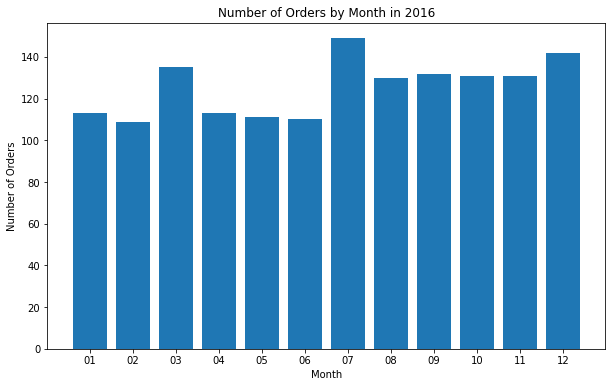

Contact name updated successfully for Bigfoot Breweries to Paul Downs.

Product_Info
Product Name: Guaraná Fantástica, Category: Beverages, Unit Price: 4.5
Product Name: Rhönbräu Klosterbier, Category: Beverages, Unit Price: 7.75
Product Name: Sasquatch Ale, Category: Beverages, Unit Price: 14
Product Name: Laughing Lumberjack Lager, Category: Beverages, Unit Price: 14
Product Name: Outback Lager, Category: Beverages, Unit Price: 15
Product Name: Chai, Category: Beverages, Unit Price: 18
Product Name: Steeleye Stout, Category: Beverages, Unit Price: 18
Product Name: Chartreuse verte, Category: Beverages, Unit Price: 18
Product Name: Lakkalikööri, Category: Beverages, Unit Price: 18
Product Name: Chang, Category: Beverages, Unit Price: 19
Product Name: Ipoh Coffee, Category: Beverages, Unit Price: 46
Product Name: Côte de Blaye, Category: Beverages, Unit Price: 263.5
Product Name: Aniseed Syrup, Category: Condiments, Unit Price: 10
Product Name: Original Frankfurter grüne Soße, Category

In [21]:
def main():
    
    database_file = "northwind.db"  
    connection = establish_connection(database_file)
    
    print("\nTable names")
    retrieve_table_names(connection)
    
    
    table_name = "Orders"
    # Call the function to retrieve and display column information for the specified table
    print("\nOrders")
    retrieve_column_info(connection, table_name)
    
    
    
   
    # Call the function to plot the histogram for the year 2016
    table_name = "Orders"  # Replace "YourTableName" with the name of the table you want to describe
    Year = "2016"
    column_names = ["OrderID", "OrderDate"]  # Replace with the actual column names
    histogram_number_of_orders_by_month(connection, table_name, Year, column_names)
    
    
    #Call the function to Update the Contact name
    update_contact_name(connection, "Bigfoot Breweries", "Paul Downs")
    
    #Call the function to print Product Info
    print("\nProduct_Info")
    product_info(connection)
    
    
    
    # Close the connection
    connection.close()

if __name__ == "__main__":
    main()


## 3

In [18]:
# This is here so that If the code is reran, it wont affect the overall expected result.
def drop_table(connection):
    
    cursor = connection.cursor()

    # Drop the table
    cursor.execute(f"DROP TABLE Tagetproducts;")
    print(f"Table Tagetproducts dropped successfully.")

    # Close the connection
    connection.close()
    
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
drop_table(connection) 

Table Tagetproducts dropped successfully.


In [19]:

def create_tagetproducts_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS Tagetproducts (
                TagetproductsID INTEGER PRIMARY KEY,
                TagetproductsName TEXT,
                Price REAL
            )
        ''')
        print("Tagetproducts table created or already exists.")
    except sqlite3.Error as e:
        print(f"Error creating Tagetproducts table: {e}")
    finally:
        cursor.close()
        
        
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
create_tagetproducts_table(connection)
        

Tagetproducts table created or already exists.


In [20]:
def insert_into_tagetproducts(connection):
    try:
        cursor = connection.cursor()
        # Insert data into Tagetproducts table
        cursor.execute("INSERT INTO Tagetproducts (TagetproductsID, TagetproductsName, Price) VALUES (?, ?, ?)", (1, 'Lough Gill Cutback IPA', 3.10))
        cursor.execute("INSERT INTO Tagetproducts (TagetproductsID, TagetproductsName, Price) VALUES (?, ?, ?)", (2, 'Guinness Stout', 2.50))
        cursor.execute("INSERT INTO Tagetproducts (TagetproductsID, TagetproductsName, Price) VALUES (?, ?, ?)", (3, 'White Hag Little Fawn', 3.49))
        
        # Commit the changes
        connection.commit()
        print("Data inserted into Tagetproducts successfully.")
    except sqlite3.Error as e:
        print(f"Error inserting data into Tagetproducts: {e}")
    finally:
        cursor.close()
        
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
insert_into_tagetproducts(connection)
        

Data inserted into Tagetproducts successfully.


In [21]:
def update_price(connection, product_name, new_price):
    try:
        cursor = connection.cursor()
        # Update the price of the specified product
        cursor.execute("UPDATE Tagetproducts SET Price = ? WHERE TagetproductsName = ?", (new_price, product_name))
        
        # Commit the changes
        connection.commit()
        print(f"Price updated successfully")
    except sqlite3.Error as e:
        print(f"Error updating price: {e}")
    finally:
        cursor.close()
        
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
update_price(connection, "Lough Gill Cutback IPA", 2.90)

Price updated successfully


In [22]:
def print_table_contents(table_name, connection):
    try:
        cursor = connection.cursor()
        # Fetch all rows from the specified table
        cursor.execute(f"SELECT * FROM {table_name}")
        rows = cursor.fetchall()
        
        # Get the column names
        cursor.execute(f"PRAGMA table_info({table_name})")
        columns = [col[1] for col in cursor.fetchall()]

        # Print column names
        print("Column Names:")
        for col in columns:
            print(col, end=", ")
        print("\n")
        
        # Print rows
        print("Table Contents:")
        for row in rows:
            print(row)
    except sqlite3.Error as e:
        print(f"Error printing table contents: {e}")
    finally:
        cursor.close()
        
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
table_name = "Tagetproducts"
print_table_contents(table_name, connection)

Column Names:
TagetproductsID, TagetproductsName, Price, 

Table Contents:
(1, 'Lough Gill Cutback IPA', 2.9)
(2, 'Guinness Stout', 2.5)
(3, 'White Hag Little Fawn', 3.49)


In [23]:
def remove_expensive_target_products(max_price, connection):
    print("\nBefore Deleting:")
    print_table_contents("Tagetproducts", connection)
    
    try:
        cursor = connection.cursor()
        # Delete rows with price larger than the specified max_price
        cursor.execute("DELETE FROM Tagetproducts WHERE Price > ?", (max_price,))
        
        # Commit the changes
        connection.commit()
        
        print(f"Rows with price larger than {max_price} deleted successfully.")
    except sqlite3.Error as e:
        print(f"Error deleting rows: {e}")
    finally:
        cursor.close()
    print("\nAfter Deleting:")
    print_table_contents("Tagetproducts", connection)
    
database_file = "northwind.db"  
connection = sqlite3.connect(database_file)
max_price = 3
remove_expensive_target_products(max_price, connection)


Before Deleting:
Column Names:
TagetproductsID, TagetproductsName, Price, 

Table Contents:
(1, 'Lough Gill Cutback IPA', 2.9)
(2, 'Guinness Stout', 2.5)
(3, 'White Hag Little Fawn', 3.49)
Rows with price larger than 3 deleted successfully.

After Deleting:
Column Names:
TagetproductsID, TagetproductsName, Price, 

Table Contents:
(1, 'Lough Gill Cutback IPA', 2.9)
(2, 'Guinness Stout', 2.5)


Note: I couldn't achieve the required result when I tried to wrap it in a main function.This is the best way to approach this particular problem

# 4

In [24]:
# Load the dataset into a pandas dataframe
df = pd.read_csv("Reviews.csv")

# Print the first few rows of the dataframe
print(df.head())
print (df.shape)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [25]:
# Displaying basic information about the DataFrame
print("1. Basic Info about the Reviews DataFrame:")
print(df.info())
print("\n")

# Displaying summary statistics of numerical columns
print("2. Summary Statistics:")
print(df.describe())
print("\n")


# Checking for missing values
print("4. Missing Values:")
print(df.isnull().sum())
print("\n")


1. Basic Info about the Reviews DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


2. Summary Statistics:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            56845

In [26]:
import re 

# Define the regular expression pattern
pattern1 = r'good'

# Count the number of reviews that contain at least one occurrence of "good"
count = sum(df['Text'].str.contains(pattern1, case=False))

print("Number of reviews containing at least one occurrence of 'good':", count)

Number of reviews containing at least one occurrence of 'good': 157805


In [27]:
pattern2 = r'(?<!\bno\s)good'

# Count the number of reviews that contain at least one occurrence of "good" not preceded by "no"
count = sum(df['Text'].str.contains(pattern2, case=False, regex=True))

print("Number of reviews containing at least one occurrence of 'good' not preceded by 'no':", count)

Number of reviews containing at least one occurrence of 'good' not preceded by 'no': 157552


In [28]:
# Sample DataFrame with 'Word' column containing words
matched_Users = df['UserId']

# Define our magic box pattern
pattern3 = r'^A9|\b\d{7}\b'

# Apply the magic box pattern to the 'Word' column and create a new column 'Matched'
df['matched_Users'] = df['UserId'].str.contains(pattern3, regex=True)

# Filter the DataFrame to show only the matched words
matched_words = df[df['matched_Users']]
print("Matched words:")
print(matched_words)

Matched words:
            Id   ProductId         UserId       ProfileName  \
52          53  B000G6RPMY  A9L6L5H9BPEBO   Edwin C. Pauzer   
123        124  B003SE19UK  A9GRWS6KP8SMA     Anne Kirkwood   
438        439  B000G6RYNE  A926YP1BSD72Y         Shopper11   
871        872  B000VKYKTG  A9T4HGTPSJ27N  Rolland M. Favre   
1093      1094  B0025ULYKI  A92JIDJABMJKY       R. Thompson   
...        ...         ...            ...               ...   
567937  567938  B0030VJ8YU  A90I4J49NU3XN             Amy W   
567970  567971  B0030VJ8YU  A90I4J49NU3XN             Amy W   
568099  568100  B000EICISA  A945RBQWGZXCK            Cheryl   
568132  568133  B0069AFIN4  A9PMSDY9BSNRW     Grandma Vicki   
568167  568168  B004VEWTTQ  A9TPV4O2YQJXO      loves purses   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
52                         1                       1      4  1348876800   
123                        1                       1      5  1292544000   
438

In [29]:
# Define the regular expression pattern
pattern4 = r'.*9.*[02468].*9.*'

# Count the number of User IDs that match the pattern
matches_count = sum(1 for UserId in matched_words['UserId'] if re.match(pattern4, UserId))

print("Number of User IDs matching the pattern in matched_words:", matches_count)

Number of User IDs matching the pattern in matched_words: 501
